This lab consists of two parts, one on background subtraction in videos, and the other on neural networks for MNIST digit classification.

Necessary packages
- opencv
- tensorflow
- numpy
- matplotlib
- IPython

You will need to install `tensorflow` for this lab. Tensorflow 1.11.0 was used to develop this lab. You can use previous version, but might need to change some code. You can do this in a way similar to how you installed `opencv` in the last lab: for example, using `conda install tensorflow`.

There are **6** exercises in this lab. Make sure to attempt all of them.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
import tensorflow as tf

#  <span style="color:blue"> Part 1: Background Subtraction in Videos </span> 

Refer to [lecture notes](https://courses.engr.illinois.edu/ece398bd/fa2018/secure/lec8_Audio-Visual-Analytics.pdf) for the simple background modelling using a single Gaussian. You will develop relevant code here.

####  <span style="color:blue"> Exercise 0: Load the videos </span> 

Here's an example of how to load the video, display it, and then save it.

7 311


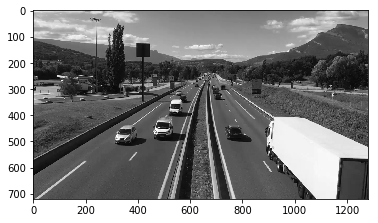

all frames covered


In [52]:
# read the video
cap = cv2.VideoCapture("data/highway_trimmed.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape

# display the first frame
plt.figure()
plt.imshow(np.array(first_gray), cmap='gray')
plt.show()

# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('video_original.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)

# go through the entire video and display + write the frames
for itr in range(video_length-1):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('Frame', frame_t)
    writer.write(frame_t)
    key = cv2.waitKey(30)
    if key == 27:
        break

print('all frames covered')

# release the reader, writer and opencv displays
cap.release()
writer.release()
cv2.destroyAllWindows()

###  <span style="color:blue"> Exercise 1: Estimate background and subtract background</span> 

As the first step, 
- Estimate the mean frame `mu` by going through the entire video.
- Go through the entire video again, and subtract the estimated background to get the foreground. 
- Save this video as `video_exercise1_parking.mp4` or `video_exercise1_highway.mp4`

####  <span style="color:blue"> Exercise 1(a): Estimate Background using Mean of Frames </span>  
- Load the related video and extract its properties
- Load the first frame for obtaining height and width
- Estimate the mean frame `mu` by going through the entire video
    - First, set `mu` to be the first frame
    - Update using using `mu = (1-alpha)*mu + alpha*frame`
    - You can set `alpha=0.1` for starting, and then play around with this parameter.
- Display the estimated mean frame `mu` in an inline pyplot
- We will use this mean image `mu` in the next step
- You do not need to save any video in this part

7 310
(720, 1280)


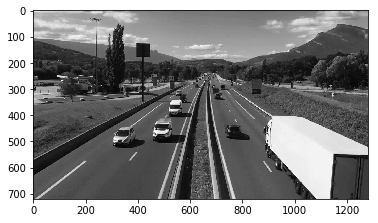

all frames covered


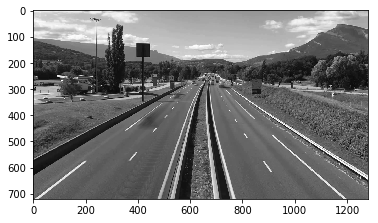

Wall time: 16 s


In [53]:
%%time 

# read the video
cap = cv2.VideoCapture("video_original.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape
mu = first_gray
print(mu.shape)
# set mu and alpha
alpha = 0.1
# display the first frame
plt.figure()
plt.imshow(np.array(first_gray), cmap='gray')
plt.show()
# go through the entire video and display+write the frames
for itr in range(video_length-1):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    mu = (1-alpha)*mu + (alpha*frame_t)
    cv2.imshow('Frame', frame_t)
    writer.write(frame_t)
    key = cv2.waitKey(30)
    if key == 27:
        break

mu = mu
print('all frames covered')
cap.release()
cv2.destroyAllWindows()

# imshow the mean mu as a figure
plt.figure()
plt.imshow(mu, cmap='gray')
plt.show()

####  <span style="color:blue"> Exercise 1(b): Subtract background for all frames </span>  
- Load the video again and extract its properties
- Load the first frame for obtaining height and width
- Use the estimated mean `mu` to remove the estimated background (Hint: use the function `cv2.absdiff()`. 
You may need to use the code 

`mu = cv2.convertScaleAbs(mu_t)`

to ensure a right format in `cv2.absdiff()`)
- You can further threshold the estimated background to remove noise using a threshold `thresh` as below:

` _, difference = cv2.threshold(difference, thresh, 255, cv2.THRESH_BINARY)`
   
- Save the resulting video using the video writer to `video_exercise1_highway.mp4`

7 311
echo


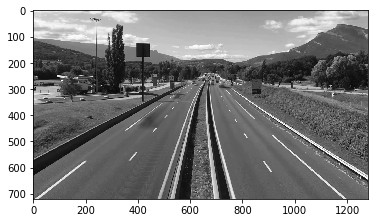

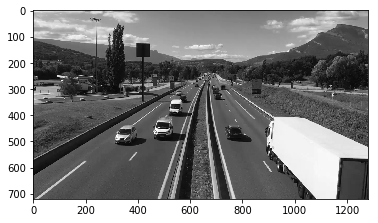

all frames covered
Wall time: 4.01 s


In [42]:
%%time 

# read the video
cap = cv2.VideoCapture("data/highway_trimmed.mp4")
# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)
# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape
# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('video_exercise1_highway.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)
# set alpha and thresh
alpha = 0.1
mu_t = cv2.convertScaleAbs(mu)
after_background_subtraction = mu_t
print('echo')
plt.figure()
plt.imshow(np.array(mu_t), cmap='gray')
plt.show()
# display the first frame
plt.figure()
plt.imshow(np.array(first_gray), cmap='gray')
plt.show()
# go through the entire video and display+write the frames
cur_frame = first_frame
while cur_frame is not None:
    _,cur_frame=cap.read()
    if cur_frame is None:
        break
    cur_frame_gray = cv2.cvtColor(cur_frame,cv2.COLOR_BGR2GRAY)
    after_background_subtraction = cv2.absdiff(cur_frame_gray,mu_t)
    writer.write(after_background_subtraction)

print('all frames covered')

cap.release()
writer.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

###  <span style="color:blue"> Exercise 2: Estimate frame mean and variance; subtract background on-the-fly </span> 

In this exercise, you will determine the mean and variance of the image frames on-the-fly. That is, you will determine the mean and variance as the frames change, and use this immediately for background subtraction. 

##### First 100 frames
- To ensure that you have a good estimate of the mean and variance, you should use the first 100 frames for determining an initial estimate of the mean `mu` and variance `sigma`.

##### Beyond 100 frames
- Whenever a given pixel is more than `k=0.5` standard deviations away from the mean, i.e. when `frame > mu + k*sigma` or `frame < mu - k*sigma` you will consider this as the foreground. The remaining pixels will be the background.
- Update the background `mu` using the `alpha` as done above
- You will need to derive the update rule for `sigma` with respect to `alpha`. Include the update rule in the space below. Also specify clearly how you implement the update rule (i.e. what variables you use, and how). Note: the variance `sigma**2` is different from the standard deviation `sigma`. Tip: `sigma_N**2 ~ 1/N(sum_i [frame - mu]**2)` 
- Define `foreground_frame` which has non-zero values at pixels which are the foreground. That is, a pixel `[i,j]` will have the value such that `foreground_frame[i, j] = frame[i, j]` if the pixel `[i,j]` falls in the range `frame[i,j] > mu[i,j] + k*sigma[i,j]` or `frame[i,j] < mu - k*sigma[i,j]`
- You can use `cv2.threshold(foreground_frame, 0, 255, cv2.THRESH_BINARY)` to generate the binary foreground images
- You can process all pixels at once. You don't need `for` loops for this.
- Finally, show the final `mu` and `sigma` as grayscale images.
- Output the foreground video comprising of `foreground_frame`s for all frames to the file `video_exercise2_highway.mp4`

<span style="color:blue"> Exercise 2(a): Update rule for sigma in terms of alpha: </span> 

Your answer: (1-$\alpha$) * ($\sigma_{N}^2$ + $\mu_{N}^2$ - $(f_{N+1}/N)^2$) - $\mu_{N+1}^2$

<span style="color:blue"> Exercise 2(b): Perform the background subtraction in real-time/on-the-fly </span> 

7 311


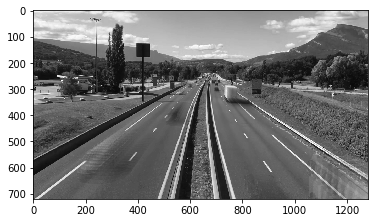

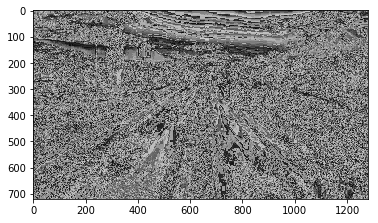

all frames covered
Wall time: 8.91 s


In [58]:
%%time 

num_frames = 100

# read the video
cap = cv2.VideoCapture("data/highway_trimmed.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape

# define mu and sigma. set mu to be the first frame, and sigma 
# as a zeros array of the same size as the first frame

mu_t = first_gray
sigma = np.zeros(first_gray.shape)

# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer2 = cv2.VideoWriter('video_exercise2_highway.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)

# set the alpha and k parameters
alpha = 0.1
k = 0.5
mu = mu_t
# go through the entire video and display+write the frames
for idx in range(num_frames):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    mu = mu_t
    mu_t = (1-alpha)*mu + (alpha*frame_t)
    mu_t = cv2.convertScaleAbs(mu_t)
    output = cv2.absdiff(frame_t, mu)
    sigma = (1-alpha) * (sigma ** 2 - mu**2) + alpha * frame_t ** 2 - mu_t**2
    sigma = np.sqrt(abs(sigma))
    filter = output>k*sigma
    after = frame_t * (filter)
    writer2.write(after)

plt.figure()
plt.imshow(mu_t, cmap='gray')
plt.show()
plt.figure()
plt.imshow(sigma, cmap='gray')
plt.show()


print('all frames covered')

cap.release()
writer2.release()
cv2.destroyAllWindows()

# imshow the final mu and sigma
#plt.figure()
#plt.imshow(f_mu, cmap='gray')
#plt.show()

#plt.figure()
#plt.imshow(sigma, cmap='gray')
#plt.show()

###  <span style="color:blue"> Exercise 3: Using mixture of gaussians for background subtraction </span> 

- In this exercise, repeat the background subtraction using the function  `cv2.createBackgroundSubtractorMOG2()` of opencv to subtract the background. 
- Play around with the parameters `history`, `threshold` and `detectShadows`
- After reading a frame, the subtractor can be called by simply using `subtractor.apply(frame)` which outputs the foreground image
- Output the foreground video comprising of the foreground frames to the file `video_exercise3_highway.mp4`

In [47]:
# read the video
cap = cv2.VideoCapture("data/highway_trimmed.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape

# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('video_exercise3_highway.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)

# define the MOG subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()
# go through the entire video and display+write the frames
for itr in range(video_length-1):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    fgmask = fgbg.apply(frame_t)
    cv2.imshow('Frame', fgmask)
    writer.write(fgmask)
    key = cv2.waitKey(30)
    if key == 27:
        break

writer.release()
cap.release()
cv2.destroyAllWindows()

7 311


7 468
(360, 480)


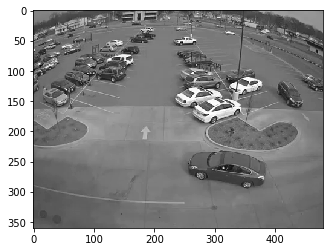

all frames covered


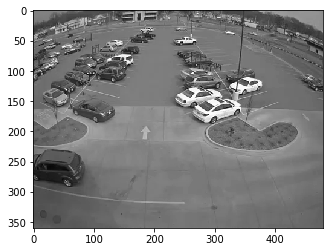

Wall time: 17.2 s


In [49]:
%%time 

# read the video
cap = cv2.VideoCapture("data/parking_trimmed.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape
mu1 = first_gray
print(mu.shape)
# set mu and alpha
alpha = 0.1
# display the first frame
plt.figure()
plt.imshow(np.array(first_gray), cmap='gray')
plt.show()
# go through the entire video and display+write the frames
for itr in range(video_length-1):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    mu1 = (1-alpha)*mu1 + (alpha*frame_t)
    cv2.imshow('Frame', frame_t)
    writer.write(frame_t)
    key = cv2.waitKey(30)
    if key == 27:
        break
        
print('all frames covered')
cap.release()
cv2.destroyAllWindows()

# imshow the mean mu as a figure
plt.figure()
plt.imshow(mu1, cmap='gray')
plt.show()

7 468
echo


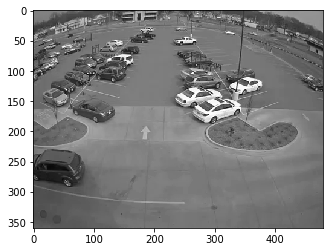

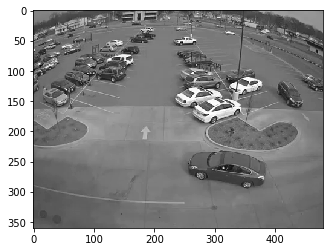

all frames covered
Wall time: 1.53 s


In [50]:
%%time 

# read the video
cap = cv2.VideoCapture("data/parking_trimmed.mp4")
# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)
# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape
# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('video_exercise1_parking.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)
# set alpha and thresh
alpha = 0.1
mu_t1 = cv2.convertScaleAbs(mu1)
after_background_subtraction = mu_t1
print('echo')
plt.figure()
plt.imshow(np.array(mu_t1), cmap='gray')
plt.show()
# display the first frame
plt.figure()
plt.imshow(np.array(first_gray), cmap='gray')
plt.show()
# go through the entire video and display+write the frames
cur_frame = first_frame
while cur_frame is not None:
    _,cur_frame=cap.read()
    if cur_frame is None:
        break
    cur_frame_gray = cv2.cvtColor(cur_frame,cv2.COLOR_BGR2GRAY)
    after_background_subtraction = cv2.absdiff(cur_frame_gray,mu_t1)
    writer.write(after_background_subtraction)

print('all frames covered')

cap.release()
writer.release()
cv2.destroyAllWindows()

7 468


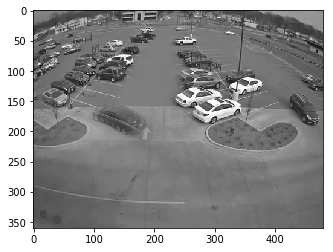

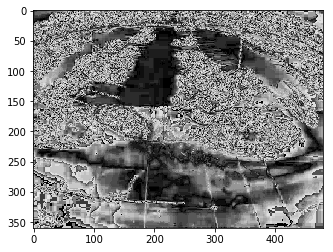

all frames covered
Wall time: 1.61 s


In [61]:
%%time 

num_frames = 100

# read the video
cap = cv2.VideoCapture("data/parking_trimmed.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape

# define mu and sigma. set mu to be the first frame, and sigma 
# as a zeros array of the same size as the first frame

mu_t = first_gray
sigma = np.zeros(first_gray.shape)

# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer2 = cv2.VideoWriter('video_exercise2_parking.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)

# set the alpha and k parameters
alpha = 0.1
k = 0.5
mu = mu_t
# go through the entire video and display+write the frames
for idx in range(num_frames):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    mu = mu_t
    mu_t = (1-alpha)*mu + (alpha*frame_t)
    mu_t = cv2.convertScaleAbs(mu_t)
    output = cv2.absdiff(frame_t, mu)
    sigma = (1-alpha) * (sigma ** 2 - mu**2) + alpha * frame_t ** 2 - mu_t**2
    sigma = np.sqrt(abs(sigma))
    filter = output>k*sigma
    after = frame_t * (filter)
    writer2.write(after)

plt.figure()
plt.imshow(mu_t, cmap='gray')
plt.show()
plt.figure()
plt.imshow(sigma, cmap='gray')
plt.show()


print('all frames covered')

cap.release()
writer2.release()
cv2.destroyAllWindows()

# imshow the final mu and sigma
#plt.figure()
#plt.imshow(f_mu, cmap='gray')
#plt.show()

#plt.figure()
#plt.imshow(sigma, cmap='gray')
#plt.show()

In [60]:
# read the video
cap = cv2.VideoCapture("data/parking_trimmed.mp4")

# obtain the properties of the video
fps = cap.get(cv2.CAP_PROP_FPS)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
video_length = int(cv2.VideoCapture.get(cap, property_id))
print(property_id, video_length)

# read the first frame
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
height, width = np.array(first_gray).shape

# create a writer to save videos
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('video_exercise3_parking.mp4',
                         fourcc,
                         fps,
                         (width, height), 
                         False)

# define the MOG subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()
# go through the entire video and display+write the frames
for itr in range(video_length-1):
    _, frame_t = cap.read()
    frame_t = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)
    fgmask = fgbg.apply(frame_t)
    cv2.imshow('Frame', fgmask)
    writer.write(fgmask)
    key = cv2.waitKey(30)
    if key == 27:
        break

writer.release()
cap.release()
cv2.destroyAllWindows()

7 468


###  <span style="color:blue"> Exercise 4: Another Video + Comparisons </span> 

####  <span style="color:blue"> Exercise 4(a): Repeat the above three exercises for `parking_trimmed.mp4` </span> 

- Save the videos correspondingly to `video_exercise1_parking.mp4`, `video_exercise3_parking.mp4` and `video_exercise3_parking.mp4`

####  <span style="color:blue"> Exercise 4(b): Comparing the subtractors </span> 

Answer the following questions using `Subtractor1`, `Subtractor 2` or `Subtractor 3` corresponding to the subtractors in the three previous exercises above:
1. Which subtractor works best for the `highway_trimmed.mp4` video? **Why?**
2. Which subtractor works best for the `parking_trimmed.mp4` video? **Why?**
3. Which subtractor(s) evolve to consider the newly parked car in `parking_trimmed.mp4` as part of the background? **Why?**
4. Note that the video `parking_trimmed.mp4` is a collection of snapshots and therefore not continuous. Which subtractor(s) perform well in this setting? That is, which subtractor(s) don't get affected by the low frame rate? **Why?**


Your answer here
1. First subtractor works best since all cars are moving in highway. Therefore we do not have to consider car not moving 
2. Third subratctor works best since it removes the parking car every second
3. Third subtractor since MOG2 algorithm checks movement everysecond 
4. Third subtractor since it does not require a lot of resources compare to second one and first one.

#  <span style="color:blue"> Part 2: Introduction to Neural Networks </span> 


## Some tutorials

There are plenty of online tutorials for tensorflow and deep learning. Feel free to explore and understand the working of tensorflow through external sources, including:
- http://cs231n.github.io/convolutional-networks/
- https://www.deeplearningbook.org/
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
- https://brohrer.github.io/how_convolutional_neural_networks_work.html
- https://www.linkedin.com/pulse/derivation-convolutional-neural-network-from-fully-connected-gad/
- https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8

This presents a playground for you to explore:
- https://playground.tensorflow.org/

Guides to tensorflow:
- https://www.infoworld.com/article/3278008/tensorflow/what-is-tensorflow-the-machine-learning-library-explained.html 
- https://www.oreilly.com/learning/hello-tensorflow
- https://www.tensorflow.org/tutorials/

###  <span style="color:blue"> Exercise 5: This exercise introduces working with fully connected neural networks with `tensorflow` </span>

- Ensure you have tensorflow correctly installed
- Tensorflow runs networks by generating computation graphs, and updating the weights of the different connections in the graph during training
- We will classify the MNIST dataset using a neural network of fully connected layers. Recall that a fully connected layer has a weight and bias term associated with every node of the previous layer to every node of the current layer. 
- Go through the code below. You will be asked to train the network for different settings and complete the `results` table and answer questions regarding the tensorflow implementation


In [45]:
# Load the MNIST data
# It's okay if this cell gives warnings.

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [46]:
# reset the computation graph of tensorflow
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# code to shuffle a batch during training
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [47]:
# load the data
X_train, y_train, X_test, y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

# flatten images to feed to a fully connected network
X_train = X_train.astype(np.float32).reshape(-1, 28*28) 
X_test = X_test.astype(np.float32).reshape(-1, 28*28)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split training into training and validation 
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [59]:
# number of inputs of the network
n_inputs = 28*28  # MNIST

# number of nodes in the 1st hidden layer
n_hidden1 = 100

# number of nodes in the 2nd hidden layer
n_hidden2 = 0

# number of nodes at output: number of classes of MNIST
n_outputs = 10

In [73]:
reset_graph()

# create a placeholder to feed input images and labels for training
# these are fed to during training and testing time

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [74]:
# define the network 

# first layer takes as input X and maps to n_hidden1 number of nodes
# the RELU activation is used
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                          activation=tf.nn.relu)

# second layer takes as input the output of n_hidden1 nodes 
# and maps to n_hidden2 number of nodes
# the RELU activation is used
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                          activation=tf.nn.relu)

# final layer takes as input the output of n_hidden2 nodes 
# and maps to n_outputs number of nodes
# output is scaled using softmax to get probabilities y_proba
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
y_proba = tf.nn.softmax(logits)

In [75]:
# define the loss function to use
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

In [76]:
# define the optimizer and learning rate to use for the training

learning_rate = 0.099
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [77]:
# for evaluation
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [78]:
# initialize all variables randomly 
init = tf.global_variables_initializer()

### Running the code block below takes about 1 minute for me. It can take you longer depending on the computational power of your computer.

In [79]:
%%time 

# number of epochs is the number of times all the images in 
# the dataset are accessed/used
n_epochs = 20

# batch size is the number of images used for 
# one step of the training
batch_size = 50

# the actual training
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if (epoch)%5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

# the final performance can be judged quantitatively by looking at the validation accuracy
print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

0 Batch accuracy: 0.12 Validation accuracy: 0.1078
5 Batch accuracy: 0.06 Validation accuracy: 0.104
10 Batch accuracy: 0.1 Validation accuracy: 0.0966
15 Batch accuracy: 0.06 Validation accuracy: 0.1128
19 Batch accuracy: 0.06 Validation accuracy: 0.1128
Wall time: 29.4 s


Your UIN: 659575499

####  <span style="color:blue"> Exercise 5(a): 
    
    - Re-run the training and report running time, number of parameters and validation accuracy for the following settings. 
    - Fill in the values in the table below. 
    - Use a learning rate as determined by your UIN. 
    - An example for number of paramaters is shown. Complete the calculation, and enter the final number. 
    - Feel free to change the batch_size and number_epochs to get a better trained network.
    
    `learning_rate` = 0.0001*(last_2_digits_of_UIN)
   
   For example, if my UIN ends in 98, I will run with the learning rate 0.0098

| Hidden Layer 1 | Hidden Layer 2 | Learning Rate | Number of parameters |  Validation accuracy | Time to run (seconds) |
|--------|-----|---|---|----|---|
| 300 nodes  | 100 nodes |0.0099 |  `28*28*300 + 300*100 + 100*10` | 0.9668 | 70|
| 200 nodes   | 100 nodes | 0.0099 | `28*28*200 + 200*100 + 100*10` |  0.963 | 68  ||

####  <span style="color:blue"> Exercise 5(b):
    
    - Re-run the training, and report running time, number of parameters and validation accuracy for the following settings.
    - Fill in the values in the table below. 
    - Use the learning rate above multiplied by a factor of 10.
    - An example for number of paramaters is shown. 
    - Complete the calculation, and enter the final number. 
    - Feel free to change the batch_size and number_epochs to get a better trained network.
    
    `learning_rate` = 0.001*(last_2_digits_of_UIN)
   
   For example, if my UIN ends in 98, I will run with the learning rate 0.098

| Hidden Layer 1 | Hidden Layer 2 | Learning Rate| Number of parameters  | Validation accuracy | Time to run (seconds) |
|--------|-----|---|----|---|---|
| 300 nodes   | 100 nodes | 0.099 | `28*28*300 + 300*100 + 100*10` |  0.212 | 69 ||
| 200 nodes    | 100 nodes | 0.099 |`28*28*200 + 200*100 + 100*10` |  0.2124 | 51.9  ||
| 100 nodes    | 50 nodes | 0.099 | `28*28*100 + 100*50 + 50*10` | 0.2118 | 36.8 ||
| 100 nodes    | 0 (layer removed) | 0.099 | `28*28*100 + 100*0 + 0*10` |  0.1128 | 29.4  ||

####  <span style="color:blue"> Exercise 5(c): Answer the following questions about the tensorflow code above:
    
    1. How many connections/parameters (excluding bias) are there in the first setting of 300 nodes in hidden layer 1 + 100 nodes in hidden layer 2, between these two hidden layers?
    2. What is an epoch?
    3. What is the optimizer being used?
    4. What is the loss being used?
    5. What is the activation function being used?
    6. What does a `dense` layer mean?

Your answers here:
1. There are total of 30,000 connections which is 100 * 300
2. Trial or number of times that we use data to train 
3. Optimizer reduces the loss (wrong prediction) as we train data more frequently.
4. It measures how wrong the prediction is
5. It makes linear expecation in different types which makes layer denser
6. There will be extra hidden layers which will decrease the number of parameters and faster to compute

###  <span style="color:blue"> Exercise 6: This exercise introduces working with convolutional neural networks with `tensorflow` </span>
    
- We will classify the MNIST dataset using a neural network of fully connected layers. Recall that a convolutional layer has filters which operate on the image. 
- Go through the code below. You will be asked to train the network for different settings and complete the results table and answer questions regarding the tensorflow implementation

In [86]:
# load the data
X_train, y_train, X_test, y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

# flatten images to feed to a fully connected network
X_train = X_train.astype(np.float32).reshape(-1, 28, 28, 1) 
X_test = X_test.astype(np.float32).reshape(-1, 28, 28, 1)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split training into training and validation 
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [99]:
# number of inputs of the network
n_inputs = 28, 28  # MNIST

# number of filters and filter size to be used for the first convolution layer
n_filters1 = 8
k_size1 = 16

# number of filters and filter size to be used for the second convolution layer
n_filters2 = 4
k_size2 = 8

# number of nodes at output: number of classes of MNIST
n_outputs = 10

In [93]:
reset_graph()

# create a placehold to feed input images and labels for training
# these are fed to during training and testing time

X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# define the network 

# first layer takes as input X and maps to n_hidden1 number of nodes
hidden1 = tf.layers.conv2d(X, n_filters1, k_size1, activation=tf.nn.relu)
hidden2 = tf.layers.conv2d(hidden1, n_filters2, k_size2, activation=tf.nn.relu)

# flatten the final maps
fc1 = tf.contrib.layers.flatten(hidden1)

# map to n_outputs number of nodes
# output is scaled using softmax to get probabilities y_proba
logits = tf.layers.dense(fc1, n_outputs, name="outputs")
y_proba = tf.nn.softmax(logits)

# define the loss function to use
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

In [94]:
# define the optimizer and learning rate to use for the training

learning_rate = 0.099
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [95]:
# for evaluation
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

### Running the code block below takes about 3 minutes for me. It can take you longer depending on the computational power of your computer.

In [100]:
%%time 

# initialize all variables randomly 
init = tf.global_variables_initializer()

# number of epochs is the number of times all the images in 
# the dataset are accessed/used
n_epochs = 5

# batch size is the number of images used for 
# one step of the training
batch_size = 10

# the actual training
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

# the final performance can be judged quantitatively by looking at the validation accuracy
print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

0 Batch accuracy: 0.1 Validation accuracy: 0.1132
1 Batch accuracy: 0.1 Validation accuracy: 0.11
2 Batch accuracy: 0.1 Validation accuracy: 0.104
3 Batch accuracy: 0.0 Validation accuracy: 0.1048
4 Batch accuracy: 0.1 Validation accuracy: 0.1052
4 Batch accuracy: 0.1 Validation accuracy: 0.1052
Wall time: 3min 15s


Your UIN: 659575499

####  <span style="color:blue"> Exercise 6(a): 
    
    
    - Re-run the training, number of parameters, and report running time and validation accuracy for the following settings.
    - Fill in the values in the table below. 
    - An example for number of paramaters is shown. Complete the calculation, and enter the final number. 
    - You can use the same kernel/filter size for both convolutional layers. 
    - Feel free to change the batch_size and number_epochs to get a better trained network.
    - Use the learning rate above multiplied by a factor of 10. For example, if my UIN ends in 98, I will run with the learning rate 0.098
        
    `learning_rate` = 0.001*(last_2_digits_of_UIN)
  

| Hidden Layer 1 | Hidden Layer 2 | Learning Rate | Number of Filter Parameters | Validation accuracy | Time to run (seconds) |
|--------|-----|---|---|----|---|
| 32 filters   | 16 filters  | 0.099 | = `32*16 + 16*8` |  0.1026 | 177 |
| 32 filters   | 8 filters | 0.099 |  = `32*16 + 8*8` | 0.1026  |192|
| 16 filters   | 8 filters | 0.099 |   = `16*16 + 8*8` | 0.104  |177|
| 8 filters    | 4 filters | 0.099 |   = `8*16 + 4*8` | 0.1052  |195|

####  <span style="color:blue"> Exercise 6(b): Answer the following questions comparing the fully connected network with the convolutional network:
    
    1. What is the main advantage of using a convolutional network?
    A) It is specialized and more efficient compare to fully connected neural network
    2. Which network do you think performs better? Why?
    A) In terms of accuracy, fully connected neural network works better since it considers everything while convolution network considers part of it. However, it takes longer to compute.

If you are interested, you can write code to use the trained networks and run test images through them. 

This concludes all labs for this section of the course. Hope you learnt useful ideas and concepts. Don't forget to fill out the feedback survey which will be posted soon!